<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>ML & DL</b></center>

<center><b><h1>Lab - 8</b></center>    
<pre>    

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [5]:
dataFrame = pd.read_csv('heart.csv')
dataFrame.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [9]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

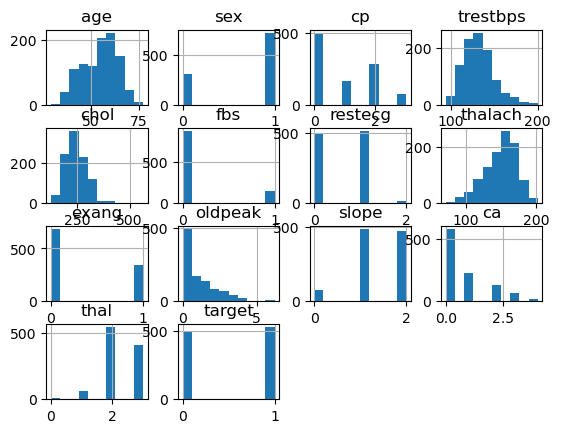

In [32]:
dataFrame.hist()

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

/Users/jayesh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

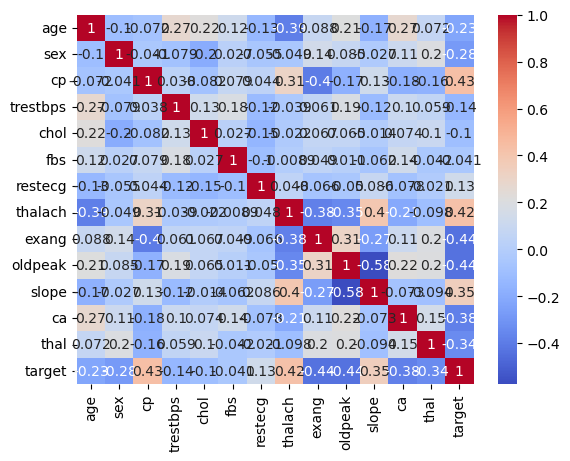

In [42]:
sb.heatmap(dataFrame.corr() , cmap='coolwarm' , annot=True)

<Axes: >

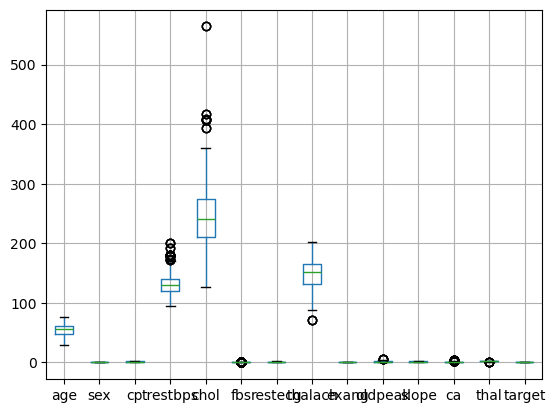

In [46]:
dataFrame.boxplot()

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [36]:
from sklearn.model_selection import train_test_split

In [72]:
X = dataFrame.drop(['target'] , axis=1)
y = dataFrame[['target']]

In [74]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
model = DecisionTreeClassifier()

In [83]:
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [85]:
y_pred = model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test , y_pred)

0.9853658536585366

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=4)

In [115]:
knn.fit(X_train , y_train)

C:\Users\er_dh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [117]:
knn_pred = knn.predict(X_test)

In [119]:
accuracy_score(y_test , knn_pred)

0.8097560975609757

# Cross Validation

In [121]:
from sklearn.model_selection import KFold

In [123]:
k = KFold(n_splits=10)

In [131]:
-X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [135]:
for train_index , test_index in k.split(X):
    # print(train_index)
    # print('----------------')
    X_train , X_test = X.values[train_index] , X.values[test_index]
    y_train , y_test = y.values[train_index] , y.values[test_index]
    model1 = DecisionTreeClassifier()
    model1.fit(X_train , y_train)
    print(model.score(X_test , y_test))

0.9902912621359223
1.0
1.0
1.0
0.9805825242718447
1.0
1.0
1.0
1.0
1.0


C:\Users\er_dh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\er_dh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\er_dh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\er_dh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\er_dh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\er_dh\anaconda3\Lib\site-packages\sklearn\base.py:4

In [137]:
from sklearn.model_selection import cross_val_score

In [145]:
cross_val_score(model,X,y,cv=10)

array([1.        , 1.        , 1.        , 0.97087379, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [148]:
import numpy as np

In [ ]:
x1 = np.arange()

<------>
[[ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1]]
<------>
[[ 1]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[2]]
<------>
[[ 1]
 [ 2]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[3]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[4]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[5]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[6]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 8]
 [ 9]
 [10]]
[[7]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 9]
 [10]]
[[8]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]]
[[9]]
<------>
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[10]]


# BS4 | web Scraping to get Data

In [152]:
import requests
import bs4

In [154]:
req = requests.get("https://darshan.ac.in/faculty-list/btech-computer")

In [156]:
req.status_code

200

In [160]:
soup = bs4.BeautifulSoup(req.text , 'lxml')

In [164]:
data = soup.select("body > main > div:nth-child(5) > div > div > div > div > div")

In [166]:
len(data)

31

In [172]:
for f in data:
    name = f.select("h2")[0].text.strip()
    print(name)

Dr. Gopi Sanghani
Dr. Nilesh Gambhava
Dr. Pradyumansinh Jadeja
Prof. Maulik Trivedi
Prof. Firoz Sherasiya
Prof. Rupesh Vaishnav
Prof. Arjun Bala
Prof. Naimish Vadodariya
Prof. Vaseem Ghada
Dr. Sharon Mohtra
Prof. Dixita Kagathara
Prof. Swati Sharma
Prof. Mayur Padia
Prof. Ashok Badresiya
Prof. UmeshKumar Thoriya
Prof. Jayesh Vagadiya
Prof. Krunal Vyas
Prof. Rajkumar Gondaliya
Prof. Mehul Bhundiya
Prof. Jay Dhamsaniya
Prof. Vishal Kansagara
Prof. Shruti Maniar
Prof. Dharmik Vasiyani
Prof. Devangi Kotak
Prof. Bhushan Joshi
Prof. Hemang Chath
Prof. Charvin Kothia
Prof. Madhuresh Fichadiya
Prof. Mehuli Domadiya
Prof. Sejal Gupta
Prof. SAMIR KARIYA
